In [11]:
import os
import google.generativeai as genai

In [49]:
# GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
GOOGLE_API_KEY = 'YOUR GOOGLE API KEY'
genai.configure(api_key=GOOGLE_API_KEY, transport='rest')

In [50]:
# 看 Gemini 有哪些模組
for m in genai.list_models():
  print(m.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision
models/embedding-001
models/aqa


In [19]:
model=genai.GenerativeModel('gemini-pro')

# **問問題**

In [20]:
response = model.generate_content('人一生在追求什麼？')
for chunk in response:
  print(chunk.text)
  print("-"*80)

**基本需求：**

* 生存：食物、住所、安全
* 安全：身體、情感和財務上的保障
* 健康：身體和心理健康

**心理需求：**

* 歸屬感：聯繫和與他人互動
* 自我實現：發揮潛能，過上有意義的生活
* 目標感：追求有目的的生活，努力實現目標
* 自尊：對自己的價值和能力的認識

**社會需求：**

* 愛與親密關係：與他人建立深層聯繫，體驗愛和關懷
* 意義感：對社會或世界產生影響，做出有意義的貢獻
* 認可和尊重：被他人承認和欣賞自己的價值

**精神需求：**

* 超越感：與比自身更大的事物或目的聯繫起來
* 和諧與平衡：在生活各個方面尋求和平與平衡
* 成長與進步：不斷學習、培養技能，成為更好的人

**其他常見追求：**

* 財富和物質享受
* 權力與影響力
* 冒險與激情
* 快樂與滿足感
* 知識與智慧
--------------------------------------------------------------------------------


# **圖生文**

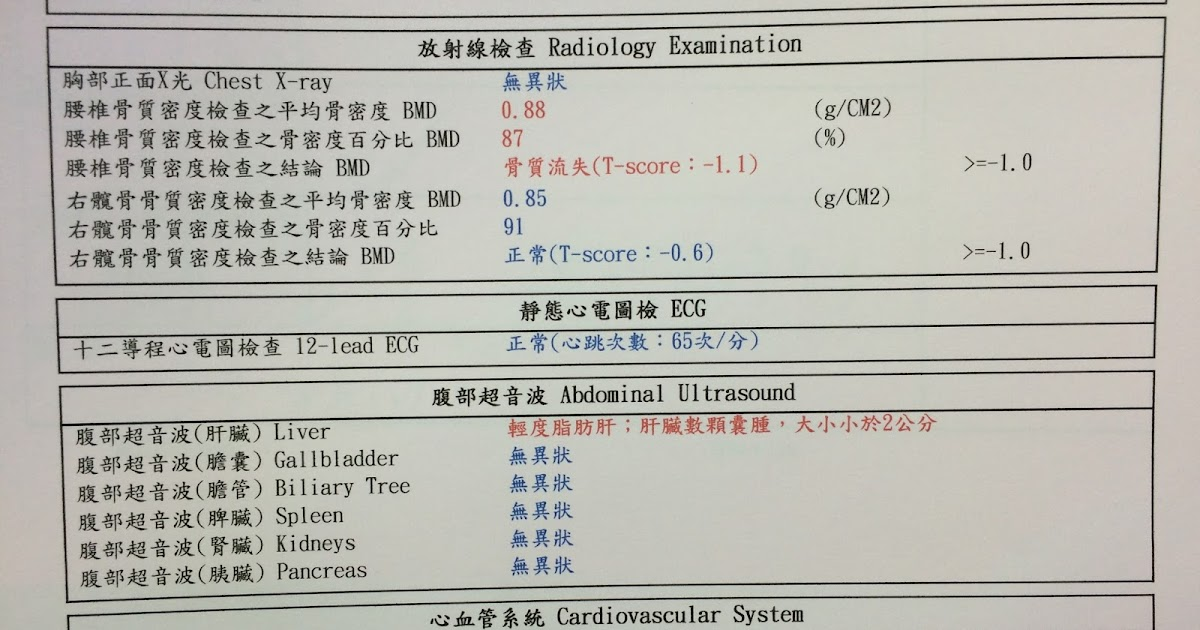

In [51]:
import PIL.Image
img = PIL.Image.open("report.jpeg")
img

In [52]:
model=genai.GenerativeModel('gemini-pro-vision')

In [53]:
response2 = model.generate_content(img)
print(response2.text)

 **胸部X光檢查**：無異常
**骨密度檢查**：
腰椎骨密度檢查之平均骨密度：0.88 g/cm2
腰椎骨密度檢查之骨密度百分比：87 %
腰椎骨密度檢查之結締組織：骨質流失（T-score：-1.1）
右側股骨頸骨密度檢查之平均骨密度：0.85 g/cm2
右側股骨頸骨密度檢查之骨密度百分比：91 %
右側股骨頸骨密度檢查之結締組織：正常（T-score：-0.6）
**心電圖檢查**：正常（心臟跳動數：65次/分）
**腹部超音波檢查**：
腹部超音波（肝臟）：輕度脂肪肝；肝臟數值範圍：大小約2公分
腹部超音波（膽囊）：無異常
腹部超音波（膽道）：無異常
腹部超音波（脾臟）：無異常
腹部超音波（胰臟）：無異常


In [54]:
response3 = model.generate_content(["列出圖片中的所有數據",img], stream=True)
response3.resolve()
print(response3.text)

 | 檢查項目 | 結果 | 正常值 |
| :--- | :--- | :--- |
| 胸部正位X光 | 正常 | --- |
| 腰椎骨密度檢查之平均骨密度 | 0.88 | g/CM2 |
| 腰椎骨密度檢查之骨密度百分比 | 87 | % |
| 腰椎骨密度檢查之總結 | 骨質流失(-1.1) | T-score <-1.0 |
| 右側骨密度檢查之平均骨密度 | 0.85 | g/CM2 |
| 右側骨密度檢查之骨密度百分比 | 91 | % |
| 右側骨密度檢查之總結 | 正常(-0.6) | T-score <-1.0 |
| 十二導程心電圖 | 正常(心跳次數：65/分) | --- |
| 腹部超音波檢查(肝臟) | 輕度脂肪肝；肝臟數值偏高，大小約2公分 | --- |
| 腹部超音波檢查(膽囊) | 無異常 | --- |
| 腹部超音波檢查(膽道) | 無異常 | --- |
| 腹部超音波檢查(脾臟) | 無異常 | --- |
| 腹部超音波檢查(腎臟) | 無異常 | --- |
| 腹部超音波檢查(胰臟) | 無異常 | --- |
